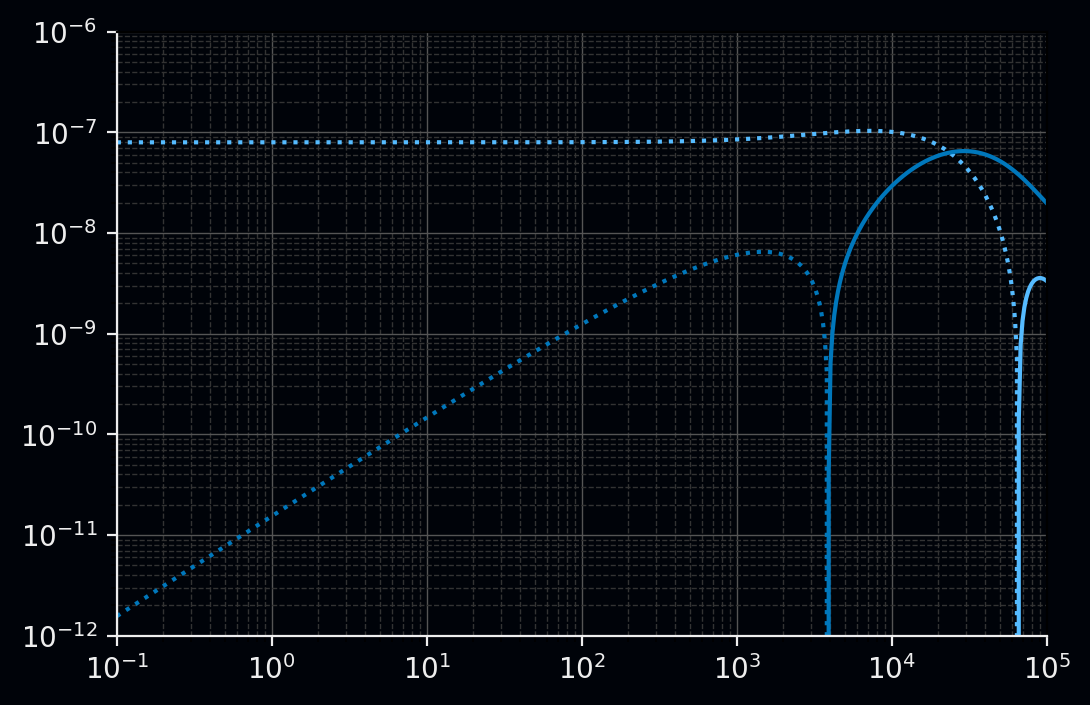

(1+0j)

In [5]:
import sys
import stylishplot

sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt

import emulatte as emu
from emulatte.source import VMD, CircularLoop


thick = []
model = emu.create_model(thick)

res = [100]
model.set_params(res)

vmd = VMD(1)

model.set_source(vmd, (0,0,0))

freq = np.logspace(-1, 5, 500)
hz, = model.fdem("H", "z", (100, 0, 0), freq)

fig = stylishplot.fdem_plot(freq, hz)
plt.show()

model.source.magnitude_f


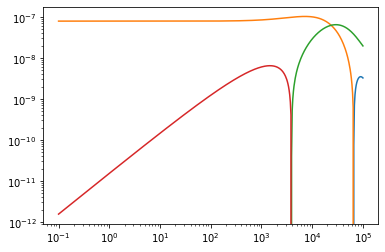

In [6]:
from emulatte.halfspace import analytical

res = 100
hz_ideal = analytical.SurfaceVMD(res, [100, 0]).fdem_hz(freq)
plt.loglog(freq, hz_ideal.real)
plt.loglog(freq, -hz_ideal.real)
plt.loglog(freq, hz_ideal.imag)
plt.loglog(freq, -hz_ideal.imag)

[25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j
 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j
 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j
 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j
 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j
 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j
 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j
 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j
 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j
 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j
 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j
 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j
 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j
 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25.+0.j 25

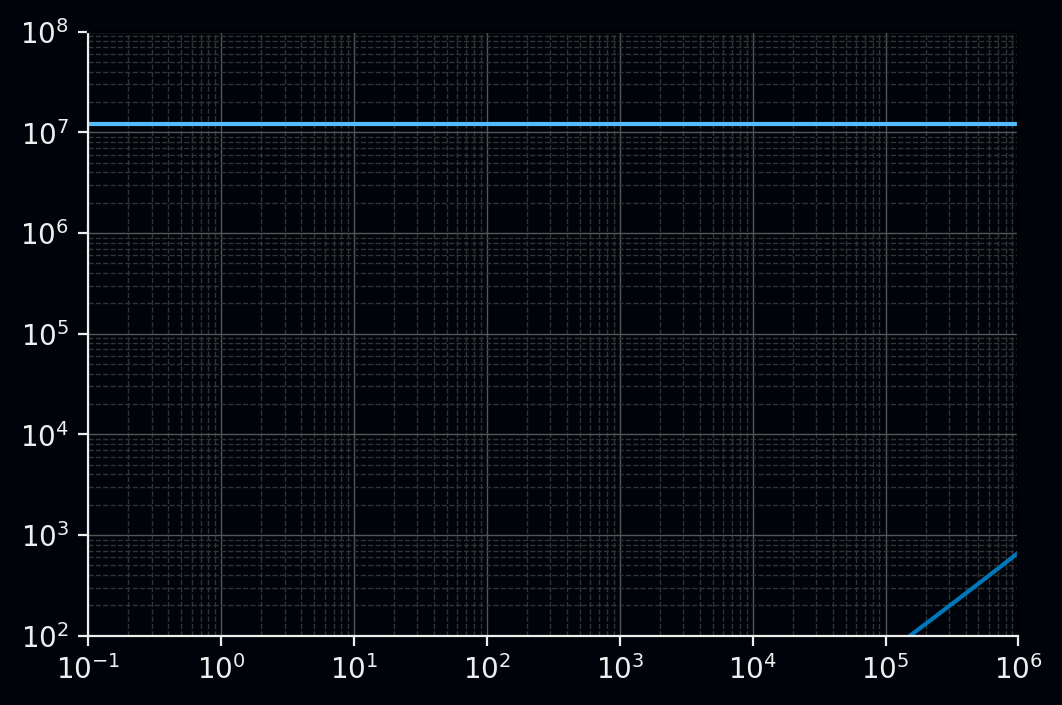

In [7]:
thick = []
model = emu.create_model(thick)

res = [100]
model.set_params(res)

cl = CircularLoop(1, 50)

model.set_source(cl, (0,0,0))

freq = np.logspace(-1, 6, 500)
hz, = model.fdem("H", "z", (0, 0, 0), freq)

fig = stylishplot.fdem_plot(freq, hz)
plt.show()

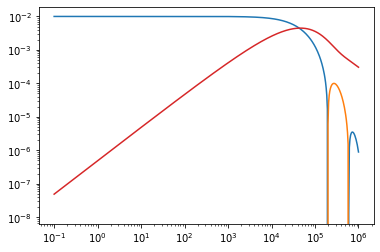

In [8]:
from emulatte.halfspace import analytical

res = 100
radius = 50
hz_ideal = analytical.SurfaceCircularLoop(res, radius).fdem_central_hz(freq)
plt.loglog(freq, hz_ideal.real)
plt.loglog(freq, -hz_ideal.real)
plt.loglog(freq, hz_ideal.imag)
plt.loglog(freq, -hz_ideal.imag)